In [20]:
pip install kagglehub

#Download Dataset

In [21]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("diishasiing/revenue-for-cab-drivers")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/diishasiing/revenue-for-cab-drivers/versions/1


#Load the Data

In [22]:
import os

# List files in the dataset directory
dataset_path = "/root/.cache/kagglehub/datasets/diishasiing/revenue-for-cab-drivers/versions/1"
os.listdir(dataset_path)

['data.csv']

In [23]:
import pandas as pd
df = pd.read_csv(f"{dataset_path}/data.csv")

<ipython-input-23-f2ca8c090423>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{dataset_path}/data.csv")


In [24]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


#Data Exploration Step

In [25]:
# of observation + columns (variables)
num_observations = df.shape[0]
num_features = df.shape[1]

print("Number of observations (rows):", num_observations)
print("Number of features (columns):", num_features)

Number of observations (rows): 6405008
Number of features (columns): 18


In [26]:
#Columns (variables)
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [27]:
#Details about your data distributions
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06
mean,1.669624e+00,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.270298e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.275662e+00
std,4.703484e-01,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.739985e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.352646e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


In [28]:
# Check for missing values in each column
missing_data = df.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

Missing values per column:
VendorID              65441
passenger_count       65441
RatecodeID            65441
store_and_fwd_flag    65441
payment_type          65441
dtype: int64


In [29]:
# Check for any null values in the filtered dataset
null_values = df.isnull().sum().sum()
if null_values == 0:
    print("There are no null values in the filtered dataset.")
else:
    print(f"There are {null_values} null values in the filtered dataset.")

There are 327205 null values in the filtered dataset.


#Scatter Plots

In [30]:
print("Max Trip Distance:", df['trip_distance'].max())
print("Max Fare Amount:", df['fare_amount'].max())

Max Trip Distance: 210240.07
Max Fare Amount: 4265.0


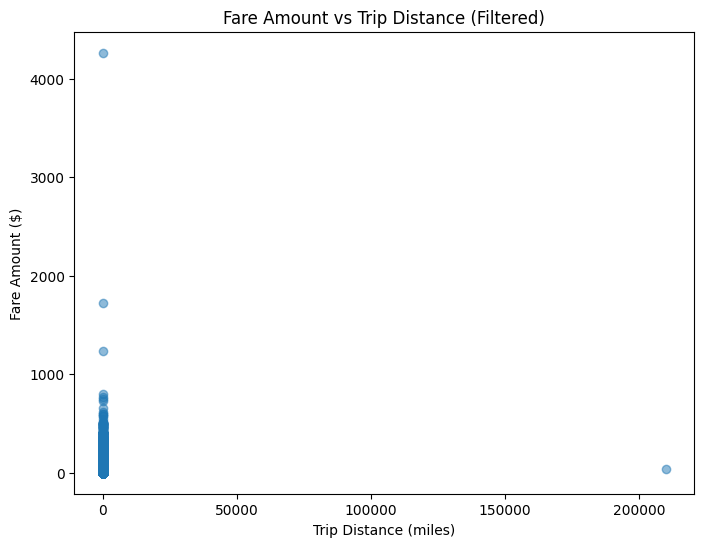

In [31]:
import matplotlib.pyplot as plt
# Set thresholds for filtering outliers
max_trip_distance = 50  # miles
max_fare_amount = 500  # dollars

# Filter datas that we don't need like: Negative distance + negative fare amount
df_filtered = df[(df['trip_distance'] >= 0) & (df['fare_amount'] >= 0)]

plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['trip_distance'], df_filtered['fare_amount'], alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs Trip Distance (Filtered)")
plt.show()

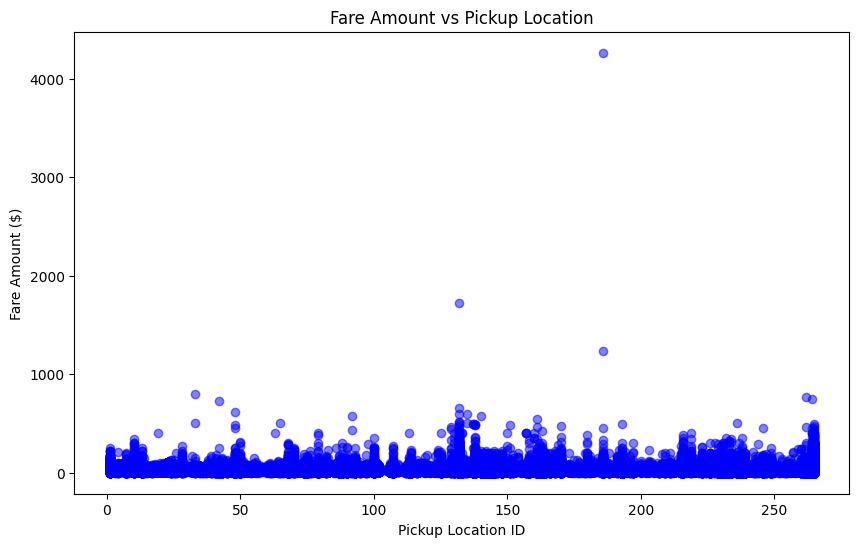

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['PULocationID'], df_filtered['fare_amount'], alpha=0.5, color='blue')
plt.xlabel("Pickup Location ID")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs Pickup Location")
plt.show()

In [33]:
# Display unique values of PULocationID
unique_pickup_ids = df_filtered['PULocationID'].unique()
print("Unique Pickup Location IDs:")
print(unique_pickup_ids)

# Display the count of each unique PULocationID
pickup_location_counts = df_filtered['PULocationID'].value_counts()
print("Pickup Location ID Counts:")
print(pickup_location_counts.head(10))  # Display the top 10 most frequent locations

Unique Pickup Location IDs:
[238 239 193   7 246 163 161  43 143 211 234 138 170 236  50 142 237  24
 232  79 233 148 144 229  41  48  95 141  90 166 249  87 113 107 185 162
 189 140 262 263 151 231  40 261 137 158 181 132  68 164 114 125  75 255
 129  93 226 260 209  65 116  74  13 145 224 256 112 264  17 186  42 157
  88   4  45 257 127 152  12 179 243 244  18 119 190  97 100 265 220 153
  66 196  25  80  36  73 135 146  49  47  51  92 136  37 198 202 173  52
  33  76 169  70  56  10 216  77  32  69 108 235   3 225 228 188 126  94
  60 213  89  83  82 254 194  14 159  34  85 168 223  61 167 247 230  67
 106 217 133 160  62 134 165 147 241 191  54 102 174  78  71  22  55 212
  20  63  35  29 215 120 240 195  72 258 208 183  91  53 121  39  19  28
 227 250 155 182   1 242  26 177 197 131  38  16 221 130 219  21 171 200
 180  44  23 117 207   5 139 222 123 206 124 218 101 210   8 248 214  31
  64  11 150 178 203  81  99  46 149 128 205 252 154 156 187 253 118  86
 175  58  98 122  15 19

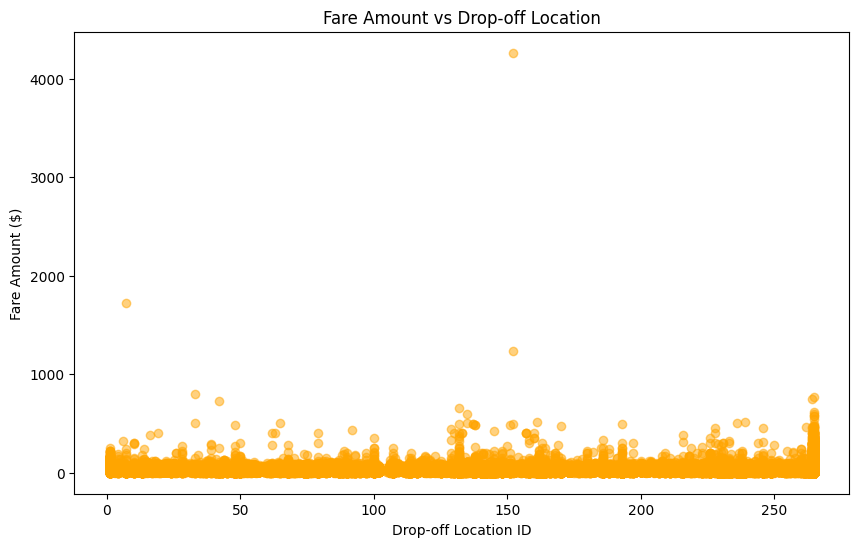

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['DOLocationID'], df_filtered['fare_amount'], alpha=0.5, color='orange')
plt.xlabel("Drop-off Location ID")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs Drop-off Location")
plt.show()

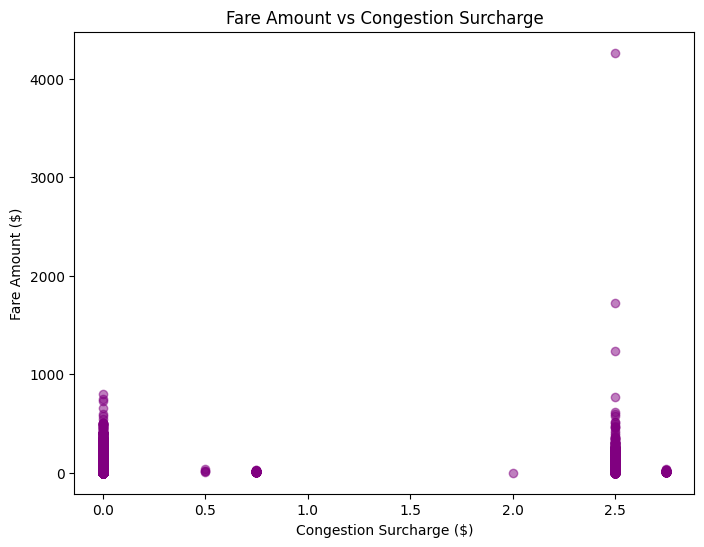

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['congestion_surcharge'], df_filtered['fare_amount'], alpha=0.5, color='purple')
plt.xlabel("Congestion Surcharge ($)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs Congestion Surcharge")
plt.show()

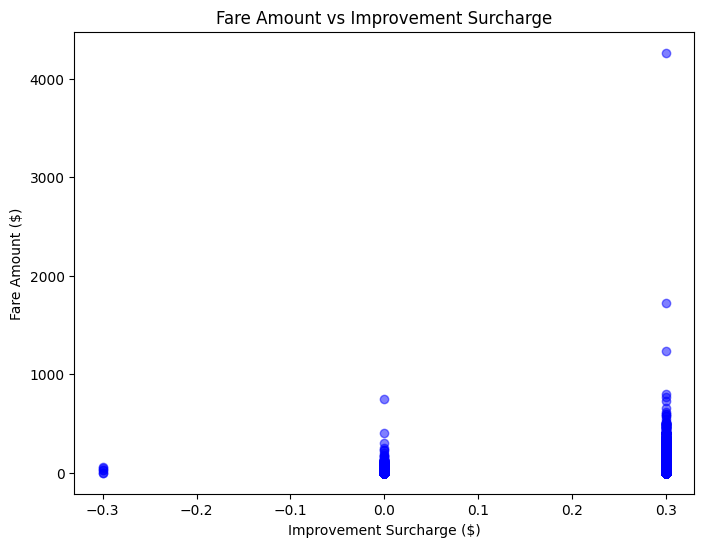

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['improvement_surcharge'], df_filtered['fare_amount'], alpha=0.5, color='blue')
plt.xlabel("Improvement Surcharge ($)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs Improvement Surcharge")
plt.show()

In [37]:
import seaborn as sns

In [ ]:
sns.pairplot(df, diag_kind='kde')

In [38]:
df.dtypes

,0
VendorID,float64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


In [41]:
numeric_columns = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

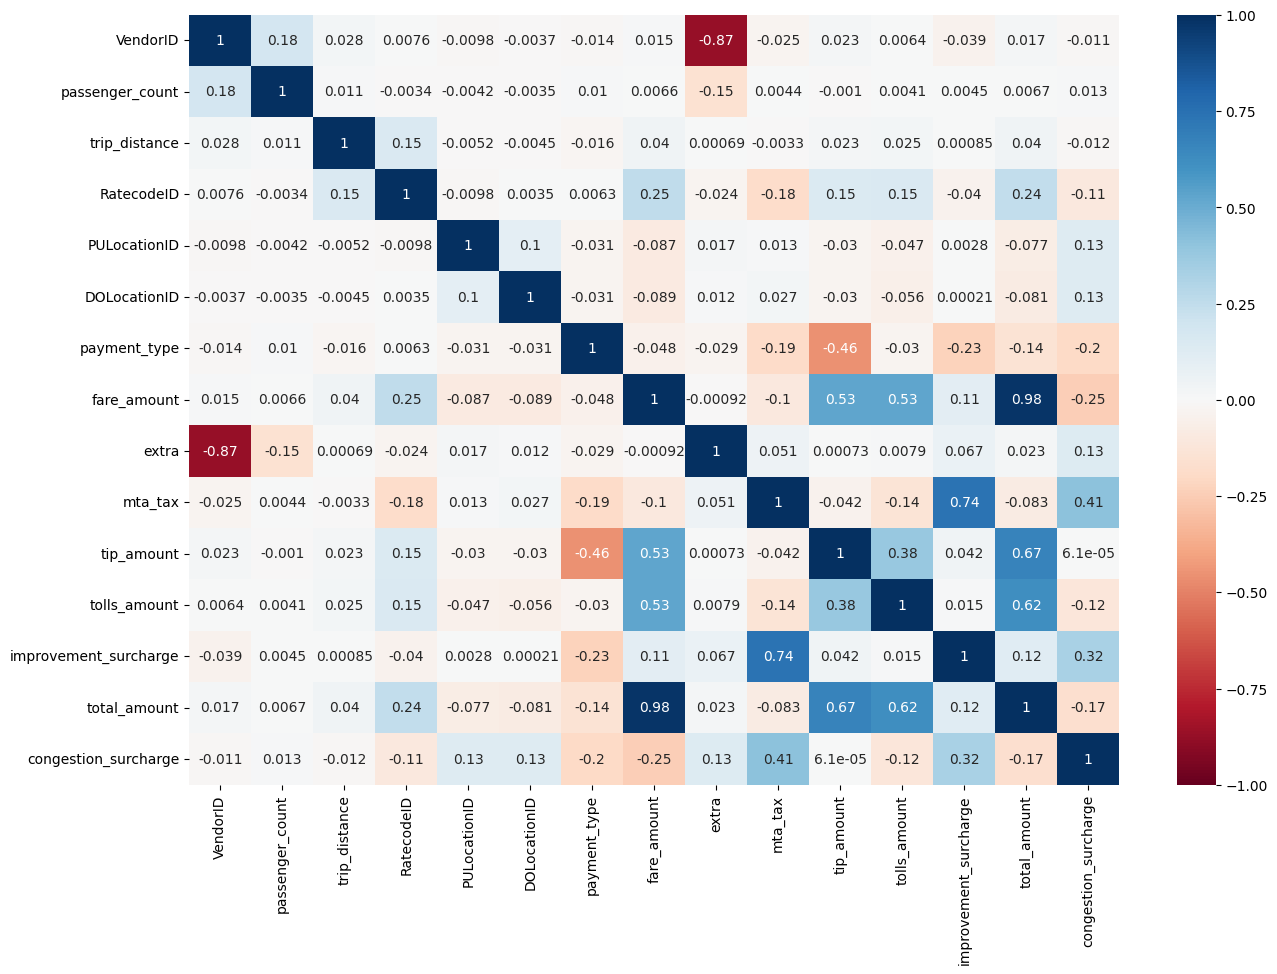

In [42]:
plt.figure(figsize=(15, 10))
corr = df[numeric_columns].corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')
plt.show()